In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.signal

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
ls 'gdrive/My Drive/left_fist.npy'

'gdrive/My Drive/left_fist.npy'


In [ ]:
left_fist = np.load('gdrive/My Drive/left_fist.npy')
right_fist = np.load('gdrive/My Drive/right_fist.npy')
both_fist = np.load('gdrive/My Drive/both_fist.npy')
both_feet = np.load('gdrive/My Drive/both_feet.npy')

In [ ]:
left_fist = np.array(left_fist[:530])
right_fist = np.array(right_fist[:530])
both_fist = np.array(both_fist)
both_feet = np.array(both_feet)
print(left_fist.shape)
print(right_fist.shape)
print(both_fist.shape)
print(both_feet.shape)

(530, 64, 113)
(530, 64, 113)
(530, 64, 113)
(530, 64, 113)


In [ ]:
## Refined signal
x = []
add = -0.2
for i in range(0,113):
    add = add + 1/160
    
    x.append(add)
## RIGHT IMAGERY MOVEMENT
import plotly.graph_objects as go
y = right_fist[0][0]
# Create random data with numpy
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x =x,y=y,
                    mode='lines + markers',
                    name='lines',
                    line_width = 4,
                    marker_size = 4))

fig.update_layout( xaxis_title='Time',
                   yaxis_title='Voltage')

In [ ]:
print(abs(np.sum(left_fist[0][0] - right_fist[0][0])))
print(abs(np.sum(left_fist[0][0] - both_fist[0][0])))
print(abs(np.sum(left_fist[0][0] - both_feet[0][0])))
print(abs(np.sum(both_feet[0][0] - both_fist[0][0])))

6.853359500868575e-07
1.6039158473338503e-05
3.0591367277883825e-05
1.4552208804545327e-05


In [ ]:
events = np.zeros((2120,4))
ones = np.ones((530,))

In [ ]:
# left fist
events[:530,0] = events[:530,0] + ones
# right fist
events[530:1060,1] = events[530:1060,1] + ones
# both fist 
events[1060:1590,2] = events[1060:1590,2] + ones
# both feet
events[1590:,3] = events[1590:,3] + ones

In [ ]:
def preprocessing(data):
    mean = np.mean(data, axis = 0)    
    var = np.var(data, axis = 0)
    data = (data - mean)/var
    return data
#data_array = preprocessing(data)

In [ ]:
left_fist1 = abs(left_fist.reshape((530, 7232)))
right_fist1 = abs(right_fist.reshape((530, 7232)))
both_fist1 = abs(both_fist.reshape((530, 7232)))
both_feet1 = abs(both_feet.reshape((530, 7232)))

left_fist1 = np.multiply(left_fist1, left_fist1)/2
right_fist11 = np.multiply(right_fist1, right_fist1)/2
both_fist1 = np.multiply(both_fist1, both_fist1)/2
both_feet1 = np.multiply(both_feet1, both_feet1)/2

left_fist1 = preprocessing(left_fist1)
right_fist1 = preprocessing(right_fist11)
both_fist1 = preprocessing(both_fist1)
both_feet1 = preprocessing(both_feet1)
right_fist1

array([[-9.28821711e+09, -1.03563504e+10, -8.14476419e+09, ...,
         4.56472489e+09, -2.05532884e+09,  6.11911764e+10],
       [ 1.46503165e+09, -9.68026298e+09, -8.13723328e+09, ...,
        -1.48039085e+10, -9.70142306e+09,  5.09271649e+10],
       [-8.73419493e+09, -3.50679412e+09,  1.25336213e+09, ...,
         7.20867080e+10, -3.66472191e+09, -1.38779462e+10],
       ...,
       [-8.86132896e+09, -1.03688135e+10, -8.07664410e+09, ...,
        -1.44324830e+10, -1.22536268e+10, -1.29050834e+10],
       [-9.30772698e+09,  4.50833321e+09,  3.10433874e+09, ...,
         8.60994270e+10,  5.34561831e+10,  3.25942255e+09],
       [-8.63013468e+09, -9.40695912e+09,  1.89499102e+08, ...,
        -4.20117269e+08, -2.97345842e+09,  8.48587906e+09]])

In [ ]:
print(left_fist1.shape)
print(right_fist11.shape)
print(both_fist1.shape)
print(both_feet1.shape)

(530, 7232)
(530, 7232)
(530, 7232)
(530, 7232)


In [ ]:
## 1st feature
x = []
add = -0.2
for i in range(0,113):
    add = add + 1/160
    
    x.append(add)
## RIGHT IMAGERY MOVEMENT
import plotly.graph_objects as go
y = right_fist11[0][:113]/2
# Create random data with numpy
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x =x,y=y,
                    mode='lines+markers',
                    name='lines',
                    line_color='red',
                    line_width = 4,
                    marker_size = 4))

fig.update_layout( xaxis_title='Time',
                   yaxis_title='Power')

In [ ]:
# fast fourier transform
a = np.fft.fft(left_fist)[:,:,:40]
a.shape

(530, 64, 40)

In [ ]:
f_left_fist = np.fft.fft(left_fist)[:,:,:40].real.reshape((530,2560))
f_left_fist = preprocessing(f_left_fist).reshape((530,2560))
f_right_fist1 = np.fft.fft(right_fist)[:,:,:40].real.reshape((530,2560))
f_right_fist = preprocessing(f_right_fist1).reshape((530,2560))
f_both_fist = np.fft.fft(both_fist)[:,:,:40].real.reshape((530,2560))
f_both_fist = preprocessing(f_both_fist).reshape((530,2560))
f_both_feet = np.fft.fft(both_feet)[:,:,:40].real.reshape((530,2560))
f_both_feet = preprocessing(f_both_feet).reshape((530,2560))

In [ ]:
print(f_left_fist.shape)
print(f_right_fist.shape)
print(f_both_fist.shape)
print(f_both_feet.shape)
f_right_fist1.shape
f_right_fist1[0].shape

(530, 2560)
(530, 2560)
(530, 2560)
(530, 2560)


(2560,)

In [ ]:
## 2nd feature
x = []
add = -0.2
for i in range(0, 40):
    add = add + 1
    
    x.append(add)
## RIGHT IMAGERY MOVEMENT
import plotly.graph_objects as go
y = f_right_fist1[0][:113]
# Create random data with numpy
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x =x,y=y,
                    mode='lines+markers',
                    name='lines',
                    line_color='brown',
                    line_width = 4,
                    marker_size = 4))

fig.update_layout( xaxis_title='Time',
                   yaxis_title='Frequency')

In [ ]:
# Power Spectral Density

In [ ]:
import scipy
psd_left_fist = scipy.signal.welch(left_fist)[1][:,:,:40]
psd_right_fist = scipy.signal.welch(right_fist)[1][:,:,:40]
psd_both_fist = scipy.signal.welch(both_fist)[1][:,:,:40]
psd_both_feet = scipy.signal.welch(both_feet)[1][:,:,:40]
psd_left_fist.shape
64*40

/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 113, using nperseg = 113



2560

In [ ]:
psd_left_fist = psd_left_fist.reshape((530, 2560))
psd_right_fist = psd_right_fist.reshape((530, 2560))
psd_both_fist = psd_both_fist.reshape((530, 2560))
psd_both_feet = psd_both_feet.reshape((530, 2560))

In [ ]:
## 3nd feature
x = []
add = -0.2
for i in range(0, 40):
    add = add + 1
    
    x.append(add)
## RIGHT IMAGERY MOVEMENT
import plotly.graph_objects as go
y = psd_right_fist[0][:57]
# Create random data with numpy
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x =x,y=y,
                    mode='lines+markers',
                    name='lines',
                    line_color='green',
                    line_width = 4,
                    marker_size = 4))

fig.update_layout( xaxis_title='frequency',
                   yaxis_title='PSD')

In [ ]:
psd_left_fist = preprocessing(psd_left_fist)
psd_right_fist = preprocessing(psd_right_fist)
psd_both_fist = preprocessing(psd_both_fist)
psd_both_feet = preprocessing(psd_both_feet)

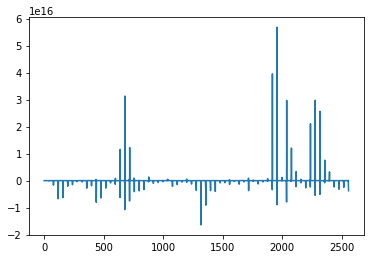

In [ ]:
plt.plot(psd_left_fist[0])

In [ ]:
# concatenate

In [ ]:
power_data = np.concatenate((left_fist1, right_fist1, both_fist1, both_feet1), axis = 0)
power_data.shape

(2120, 7232)

In [ ]:
fft_data = np.concatenate((f_left_fist, f_right_fist, f_both_fist, f_both_feet), axis = 0)
fft_data.shape

(2120, 2560)

In [ ]:
psd_data = np.concatenate((psd_left_fist, psd_right_fist, psd_both_fist, psd_both_feet), axis = 0)
psd_data.shape

(2120, 2560)

In [ ]:
# reshaping into ( *, * , 1)

In [ ]:
new_power_data = power_data.reshape((2120, 7232, 1))
new_power_data.shape

(2120, 7232, 1)

In [ ]:
new_fft_data = fft_data.reshape((2120, 2560, 1))
new_fft_data.shape

(2120, 2560, 1)

In [ ]:
new_psd_data = psd_data.reshape((2120, 2560, 1))
new_psd_data.shape

(2120, 2560, 1)

In [ ]:
from keras.layers import concatenate

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Input, concatenate
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, Conv2D, LSTM, AveragePooling1D
from tensorflow.keras.layers import MaxPooling1D, MaxPooling2D
from tensorflow.keras.layers import LeakyReLU, BatchNormalization

In [ ]:
x_train_pow, x_test_pow, y_train, y_test = train_test_split(new_power_data, events, test_size=0.4, random_state=42)

In [ ]:
x_train_fft, x_test_fft, y_train_fft, y_test_fft = train_test_split(new_fft_data, events, test_size=0.4, random_state=42)

In [ ]:
x_train_psd, x_test_psd, y_train_psd, y_test_psd = train_test_split(new_psd_data, events, test_size=0.4, random_state=42)

In [ ]:
def power_model():
  # initialize the input shape and channel dimension, assuming
  # TensorFlow/channels-last ordering
  #inputShape = (height, width, depth)
  chanDim = -1

  # define the model input
  inputs = Input(shape=(7232,1))

  x = Conv1D(filters=50, kernel_size=11)(inputs)
  x = Activation("relu")(x)
  x = Conv1D(filters=15, kernel_size=3)(x)
  x = Activation("relu")(x)
  x = Dropout(0.5)(x)
  x = AveragePooling1D(2)(x)
  x = Flatten()(x)

  # construct the CNN
  model = Model(inputs, x)

  # return the CNN
  return model


In [ ]:
pow_model = power_model()
pow_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7232, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7222, 50)          600       
_________________________________________________________________
activation (Activation)      (None, 7222, 50)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7220, 15)          2265      
_________________________________________________________________
activation_1 (Activation)    (None, 7220, 15)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7220, 15)          0         
_________________________________________________________________
average_pooling1d (AveragePo (None, 3610, 15)          0     

In [ ]:
def fft_model_func():
 
  # define the model input
  inputs = Input(shape=(2560,1))

  x = Conv1D(filters=50, kernel_size=11)(inputs)
  x = Activation("relu")(x)
  x = Conv1D(filters=15, kernel_size=3)(x)
  x = Activation("relu")(x)
  x = Dropout(0.5)(x)
  x = AveragePooling1D(2)(x)
  x = Flatten()(x)

  # construct the CNN
  model = Model(inputs, x)

  # return the CNN
  return model


In [ ]:
fft_model = fft_model_func()
fft_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2560, 1)]         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2550, 50)          600       
_________________________________________________________________
activation_2 (Activation)    (None, 2550, 50)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2548, 15)          2265      
_________________________________________________________________
activation_3 (Activation)    (None, 2548, 15)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2548, 15)          0         
_________________________________________________________________
average_pooling1d_1 (Average (None, 1274, 15)          0   

In [ ]:
def psd_model_func():
 
  # define the model input
  inputs = Input(shape=(2560,1))

  x = Conv1D(filters=50, kernel_size=11)(inputs)
  x = Activation("relu")(x)
  x = Conv1D(filters=15, kernel_size=3)(x)
  x = Activation("relu")(x)
  x = Dropout(0.5)(x)
  x = AveragePooling1D(2)(x)
  x = Flatten()(x)

  # construct the CNN
  model = Model(inputs, x)

  # return the CNN
  return model


In [ ]:

psd_model = psd_model_func()
psd_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2560, 1)]         0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 2550, 50)          600       
_________________________________________________________________
activation_4 (Activation)    (None, 2550, 50)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 2548, 15)          2265      
_________________________________________________________________
activation_5 (Activation)    (None, 2548, 15)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2548, 15)          0         
_________________________________________________________________
average_pooling1d_2 (Average (None, 1274, 15)          0   

In [ ]:
#HCNN = Sequential()

combinedInput = concatenate([pow_model.output, fft_model.output, psd_model.output])
x = Dense(120, activation='relu')(combinedInput)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(120, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(150, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(120, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(15, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(4, activation='softmax')(x)

model = Model(inputs=[pow_model.input, fft_model.input, psd_model.input], outputs=x)

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 7232, 1)]    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2560, 1)]    0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 2560, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 7222, 50)     600         input_1[0][0]                    
____________________________________________________________________________________________

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['acc'])

In [ ]:
history1 = model.fit(
	[x_train_pow, x_train_fft, x_train_psd], y_train,
	validation_data=([x_test_pow, x_test_fft, x_test_psd], y_test),
	epochs=50)

Epoch 1/50
40/40 [==============================] - 37s 928ms/step - loss: 1.5240 - acc: 0.3624 - val_loss: 1.2365 - val_acc: 0.3821
Epoch 2/50
40/40 [==============================] - 33s 829ms/step - loss: 1.0371 - acc: 0.5621 - val_loss: 1.0098 - val_acc: 0.6191
Epoch 3/50
40/40 [==============================] - 33s 823ms/step - loss: 0.7862 - acc: 0.6903 - val_loss: 0.6822 - val_acc: 0.8007
Epoch 4/50
40/40 [==============================] - 33s 825ms/step - loss: 0.5656 - acc: 0.7932 - val_loss: 0.3981 - val_acc: 0.8927
Epoch 5/50
40/40 [==============================] - 33s 830ms/step - loss: 0.4054 - acc: 0.8671 - val_loss: 0.2692 - val_acc: 0.9269
Epoch 6/50
40/40 [==============================] - 33s 828ms/step - loss: 0.3285 - acc: 0.8978 - val_loss: 0.1641 - val_acc: 0.9658
Epoch 7/50
40/40 [==============================] - 33s 829ms/step - loss: 0.2530 - acc: 0.9332 - val_loss: 0.1435 - val_acc: 0.9587
Epoch 8/50
40/40 [==============================] - 33s 828ms/step - 

In [ ]:
'''from sklearn.metrics import confusion_matrix
import tensorflow as tf
def result(x_test, y_test):
  y_pred = model.predict(x_test)
  y_classes = y_pred.argmax(axis=-1)
  label =  tf.keras.utils.to_categorical(np.asarray(y_classes)) 
  matrix = confusion_matrix(y_test.argmax(axis=1), label.argmax(axis=1))
  FP = np.sum(matrix.sum(axis=0) - np.diag(matrix))/4  
  FN = np.sum(matrix.sum(axis=1) - np.diag(matrix))/4
  TP = np.sum(np.diag(matrix))/4
  TN = np.sum(matrix.sum() - (FP + FN + TP))/4
  data = []
  # Overall accuracy
  accuracy = (TP+TN)/(TP+FP+FN+TN)
  data.append(accuracy)
  #Error
  error = (FP + FN)/(TP + TN + FN + FP)
  data.append(error)
  # Sensitivity, hit rate, recall, or true positive rate
  sensitivity = TP/(TP+FN)  
  data.append(sensitivity)
  # Specificity or true negative rate
  specificity = TN/(TN+FP)
  data.append(specificity)
  # Precision or positive predictive value
  precision = TP/(TP+FP)
  data.append(precision)
  # Fall out or false positive rate
  false_positive_rate = FP/(FP+TN)
  data.append(false_positive_rate)

  #F-score
  f_score = (2*(precision *sensitivity))/(precision  + sensitivity)
  data.append(f_score)
  # False discovery rate
  FDR = FP/(TP+FP)
  data.append(FDR)
  # Negative predictive value
  NPV = TN/(TN+FN)
  data.append(NPV)
  return data
test_results = result([x_test_pow, x_test_fft, x_test_psd], y_test)
test_results
'''

In [ ]:
train_results = result([x_train_pow, x_train_fft, x_train_psd], y_train)
train_results

In [ ]:
history1.history

{'acc': [0.4292452931404114,
  0.4921383559703827,
  0.49056604504585266,
  0.5031446814537048,
  0.4913522005081177,
  0.48977985978126526,
  0.5110062956809998,
  0.5086477994918823,
  0.5102201104164124,
  0.5031446814537048,
  0.5094339847564697,
  0.5023584961891174,
  0.499213844537735,
  0.5204402804374695,
  0.5062893033027649,
  0.5220125913619995,
  0.5196540951728821,
  0.5141509175300598,
  0.5243710875511169,
  0.5345911979675293,
  0.5400943160057068,
  0.5621069073677063,
  0.5377358198165894,
  0.5723270177841187,
  0.579402506351471,
  0.597484290599823,
  0.5935534834861755,
  0.6344339847564697,
  0.6454402804374695,
  0.6572327017784119,
  0.6289308071136475,
  0.676886796951294,
  0.698113203048706,
  0.7146226167678833,
  0.7122641801834106,
  0.7397798895835876,
  0.7444968819618225,
  0.7523584961891174,
  0.7649371027946472,
  0.7838050127029419,
  0.7743710875511169,
  0.7885220050811768,
  0.805031418800354,
  0.7948113083839417,
  0.8073899149894714,
  0.794

In [ ]:
import plotly.graph_objects as go
y1 = history1.history['acc']
y2 = history1.history['val_acc']

fig = go.Figure()
fig.add_trace(go.Scatter(y=y1,
                    mode='lines+markers',
                    name='Training Accuracy',
                    line_color='blue'))
fig.add_trace(go.Scatter(y=y2,
                    mode='lines+markers',
                    name='Test Accuracy',
                    line_color='red'))

fig.update_layout( xaxis_title='Number of Iterations',
                   yaxis_title='Accuracy')


In [ ]:
l1 = history1.history['loss']
l2 = history1.history['val_loss']

fig = go.Figure()
fig.add_trace(go.Scatter(y=l1,
                    mode='lines+markers',
                    name='Training Loss',
                    line_color='blue'))
fig.add_trace(go.Scatter(y=l2,
                    mode='lines+markers',
                    name='Test Loss',
                    line_color='red'))

fig.update_layout( xaxis_title='Number of Iterations',
                   yaxis_title='Loss')


In [ ]:
weights = model.get_weights()
weights[1].shape


(50,)

In [ ]:
## POWER 1st kernel

import plotly.graph_objects as go
w1 = weights[0][:,:,0].reshape(11)
w1.shape

fig = go.Figure()
fig.add_trace(go.Scatter(y=w1,
                    mode='lines+markers',
                    line_width = 5,
                    marker_size = 4))

In [ ]:
right_power = right_fist1[0][:113]

def convolution(sig, w):
  mul = np.multiply(sig, w)
  add = np.sum(mul)
  return add

out = []
for i in range(103):
  one = convolution(right_power[i:i+11], w1)
  out.append(one)

fig = go.Figure()
fig.add_trace(go.Scatter(y=out,
                    mode='lines+markers',
                    line_width = 5,
                    marker_size = 4))

In [ ]:
## POWER 2st kernel

import plotly.graph_objects as go
w2 = weights[0][:,:,1].reshape(11)
w2.shape

fig = go.Figure()
fig.add_trace(go.Scatter(y=w2,
                    mode='lines+markers',
                    line_color='red',
                    line_width = 5,
                    marker_size = 4))

In [ ]:
right_power = right_fist1[0][:113]

def convolution(sig, w):
  mul = np.multiply(sig, w)
  add = np.sum(mul)
  return add

out = []
for i in range(103):
  one = convolution(right_power[i:i+11], w2)             ############## 2nd feature convolution
  out.append(one)

fig = go.Figure()
fig.add_trace(go.Scatter(y=out,
                    mode='lines+markers',
                    line_color='red',
                    line_width = 5,
                    marker_size = 4))

In [ ]:
## POWER 2st kernel

import plotly.graph_objects as go
w3 = weights[0][:,:,-1].reshape(11)
w3.shape

fig = go.Figure()
fig.add_trace(go.Scatter(y=w3,
                    mode='lines+markers',
                    line_color='green',
                    line_width = 5,
                    marker_size = 4))

In [ ]:
right_power = right_fist1[0][:113]

def convolution(sig, w):
  mul = np.multiply(sig, w)
  add = np.sum(mul)
  return add

out = []
for i in range(103):
  one = convolution(right_power[i:i+11], w3)             ############## 3nd feature convolution
  out.append(one)

fig = go.Figure()
fig.add_trace(go.Scatter(y=out,
                    mode='lines+markers',
                    line_color='green',
                    line_width = 5,
                    marker_size = 4))

In [ ]:
######################################## FFT ########################################

In [ ]:
## POWER 1st kernel

import plotly.graph_objects as go
w1 = weights[2][:,:,0].reshape(11)
w1.shape

fig = go.Figure()
fig.add_trace(go.Scatter(y=w1,
                    mode='lines+markers',
                    line_width = 5,
                    marker_size = 4))

In [ ]:
right_power = f_right_fist[0][:40]

def convolution(sig, w):
  mul = np.multiply(sig, w)
  add = np.sum(mul)
  return add

out = []
for i in range(30):
  one = convolution(right_power[i:i+11], w1)
  out.append(one)

fig = go.Figure()
fig.add_trace(go.Scatter(y=out,
                    mode='lines+markers',
                    line_width = 5,
                    marker_size = 4
                    ))

In [ ]:
## POWER 2st kernel

import plotly.graph_objects as go
w2 = weights[2][:,:,1].reshape(11)
w2.shape

fig = go.Figure()
fig.add_trace(go.Scatter(y=w2,
                    mode='lines+markers',
                    line_color='red',line_width = 5,
                    marker_size = 4))

In [ ]:
right_power = f_right_fist[0][:40]

def convolution(sig, w):
  mul = np.multiply(sig, w)
  add = np.sum(mul)
  return add

out = []
for i in range(30):
  one = convolution(right_power[i:i+11], w2)             ############## 2nd feature convolution
  out.append(one)

fig = go.Figure()
fig.add_trace(go.Scatter(y=out,
                    mode='lines+markers',
                    line_color='red',line_width = 5,
                    marker_size = 4))

In [ ]:
## POWER 2st kernel

import plotly.graph_objects as go
w3 = weights[2][:,:,-1].reshape(11)
w3.shape

fig = go.Figure()
fig.add_trace(go.Scatter(y=w3,
                    mode='lines+markers',
                    line_color='green',line_width = 5,
                    marker_size = 4))

In [ ]:
right_power = f_right_fist[0][:40]

def convolution(sig, w):
  mul = np.multiply(sig, w)
  add = np.sum(mul)
  return add

out = []
for i in range(30):
  one = convolution(right_power[i:i+11], w3)             ############## 3nd feature convolution
  out.append(one)

fig = go.Figure()
fig.add_trace(go.Scatter(y=out,
                    mode='lines+markers',
                    line_color='green',line_width = 5,
                    marker_size = 4))

In [ ]:
################################# PSD #################################################

In [ ]:
## POWER 1st kernel

import plotly.graph_objects as go
w1 = weights[4][:,:,0].reshape(11)
w1.shape

fig = go.Figure()
fig.add_trace(go.Scatter(y=w1,
                    mode='lines+markers',line_width = 5,
                    marker_size = 4))

In [ ]:
right_power = psd_right_fist[0][:40]

def convolution(sig, w):
  mul = np.multiply(sig, w)
  add = np.sum(mul)
  return add

out = []
for i in range(30):
  one = convolution(right_power[i:i+11], w1)
  out.append(one)

fig = go.Figure()
fig.add_trace(go.Scatter(y=out,
                    mode='lines+markers',line_width = 5,
                    marker_size = 4
                    ))

In [ ]:
## POWER 2st kernel

import plotly.graph_objects as go
w2 = weights[4][:,:,1].reshape(11)
w2.shape

fig = go.Figure()
fig.add_trace(go.Scatter(y=w2,
                    mode='lines+markers',
                    line_color='red',line_width = 5,
                    marker_size = 4))

In [ ]:
right_power = psd_right_fist[0][:40]

def convolution(sig, w):
  mul = np.multiply(sig, w)
  add = np.sum(mul)
  return add

out = []
for i in range(30):
  one = convolution(right_power[i:i+11], w2)             ############## 2nd feature convolution
  out.append(one)

fig = go.Figure()
fig.add_trace(go.Scatter(y=out,
                    mode='lines+markers',
                    line_color='red',line_width = 5,
                    marker_size = 4))

In [ ]:
## POWER 2st kernel

import plotly.graph_objects as go
w3 = weights[4][:,:,-1].reshape(11)
w3.shape

fig = go.Figure()
fig.add_trace(go.Scatter(y=w3,
                    mode='lines+markers',
                    line_color='green',line_width = 5,
                    marker_size = 4))

In [ ]:
right_power = psd_right_fist[0][:40]

def convolution(sig, w):
  mul = np.multiply(sig, w)
  add = np.sum(mul)
  return add

out = []
for i in range(30):
  one = convolution(right_power[i:i+11], w3)             ############## 3nd feature convolution
  out.append(one)

fig = go.Figure()
fig.add_trace(go.Scatter(y=out,
                    mode='lines+markers',
                    line_color='green',line_width = 5,
                    marker_size = 4))